# Livre II : Création des modèles

Ce livre a pour but de se concentrer sur la partie machine learning du projet. En effet, après avoir formaté les bases de données et appris à les connaître, l'objectif et maintenant de mettre en place des modèles pouvant être bénéfiques à une base de données.

## Partie I : Évaluation des fournisseurs

### Chapitre 1 : Création de la base de données
Dans le cadre de la création d'un modèle de machine learning, celui-ci a besoin d'une base de données. Il prend en compte plusieurs varaibles afin de créer une prévision. Ici nous allons donc créer une base de données avec plusieurs variables qui servent à donner une note à chauqe fournisseur. La note sera le Y, soit la valeure à prédire et toutes les autres variables seront X, soit les labels permettant la prévision. 

In [3]:
# Importation des packages nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Importation des bases de données nécessaires à la création du dataframe pour le modèle
df_sourcing = pd.read_csv('Data Formated/Sourcing2017Clean.csv')
df_purchases = pd.read_csv('Data Formated/Purchases2016Clean.csv', parse_dates = ['Purchase_Date', 'Receiving_Date', 'Invoice_Date', 'Pay_Date'])

Le modèle aura donc 12 variables, dont 9 labels, 1 Y et 2 variables informatives. 

In [5]:
df_purchases.head()

,Unnamed: 0,Inventory_ID,Store_ID,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Vendor_ID,Vendor_Name,Purchase_Number,Purchase_Date,Receiving_Date,Invoice_Date,Pay_Date,Purchasing_Price,Number_Of_Items,Order_Price,Order_Volume_(ML)
0,0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,1,750,750,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,4500
1,1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1,1750,1750,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,7000
2,2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1,1750,1750,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,8750
3,3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1,1750,1750,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,10500
4,4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,1,750,750,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,3750


In [6]:
df_sourcing.head()

,Unnamed: 0,Product_ID,Product_Name,Purchasing_Price,Selling_Price,Profit,Quantity,Volume_Per_Unit_ml,Total_Volume_ml,Classification,Vendor_ID,Vendor_Name
0,0,58,Gekkeikan Black & Gold Sake,9.28,12.99,3.71,1,750.0,750.0,1,8320,SHAW ROSS INT L IMP LTD
1,1,62,Herradura Silver Tequila,28.67,36.99,8.32,1,750.0,750.0,1,1128,BROWN-FORMAN CORP
2,2,63,Herradura Reposado Tequila,30.46,38.99,8.53,1,750.0,750.0,1,1128,BROWN-FORMAN CORP
3,3,72,No. 3 London Dry Gin,26.11,34.99,8.88,1,750.0,750.0,1,9165,ULTRA BEVERAGE COMPANY LLP
4,4,75,Three Olives Tomato Vodka,10.94,14.99,4.05,1,750.0,750.0,1,7245,PROXIMO SPIRITS INC.


In [7]:
# Drop la colonne unnamed qui était l'index
df_purchases.drop('Unnamed: 0', axis = 1, inplace = True)
df_sourcing.drop('Unnamed: 0', axis = 1, inplace = True)

Les labels à créer sont les suivants :

* Average delivery time - P
* Max delivery time - P
* Average product profit - S
* Average product cost - S
* Average Volume - S
* Average Order Items - P 
* Average Order cost - P
* Average Order Profit - P
* Average Order Volume - P

Les variables informatives seront :

* Vendor_ID
* Vendor_Name

Et le Y sera :

* Vendor_Rating

In [8]:
# Average delivery time
df_purchases.insert(12, 'Delivery_Time', df_purchases['Receiving_Date'] - df_purchases['Purchase_Date'])
df_purchases.head()

,Inventory_ID,Store_ID,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Vendor_ID,Vendor_Name,Purchase_Number,Purchase_Date,Receiving_Date,Delivery_Time,Invoice_Date,Pay_Date,Purchasing_Price,Number_Of_Items,Order_Price,Order_Volume_(ML)
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,1,750,750,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,12 days,2016-01-04,2016-02-16,35.71,6,214.26,4500
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1,1750,1750,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,10 days,2016-01-07,2016-02-21,9.35,4,37.40,7000
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1,1750,1750,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,11 days,2016-01-07,2016-02-21,9.41,5,47.05,8750
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1,1750,1750,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,10 days,2016-01-07,2016-02-21,9.35,6,56.10,10500
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,1,750,750,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,9 days,2016-01-09,2016-02-16,21.32,5,106.60,3750


In [9]:
# Création du df d'average delivery time par fournisseur
ADT = df_purchases.groupby(by = ['Vendor_ID','Vendor_Name'])['Delivery_Time'] \
    .agg(['mean'])
ADT['mean'] = ADT['mean'].dt.days
ADT.rename(columns = {'mean' : 'Delivery_Time_Average'}, inplace = True)
ADT.reset_index(inplace = True)
ADT

,Vendor_ID,Vendor_Name,Delivery_Time_Average
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",9
1,54,AAPER ALCOHOL & CHEMICAL CO,10
2,60,ADAMBA IMPORTS INTL INC,7
3,105,ALTAMAR BRANDS LLC,7
4,200,AMERICAN SPIRITS EXCHANGE,8
...,...,...,...
123,98450,Serralles Usa LLC,7
124,99166,STARK BREWING COMPANY,8
125,172662,SWEETWATER FARM,7
126,173357,TAMWORTH DISTILLING,8


In [10]:
# Création du df de max delivery time par fournisseur
MDT = df_purchases.groupby(by = ['Vendor_ID','Vendor_Name'])['Delivery_Time'] \
    .agg(['max'])
MDT['max'] = MDT['max'].dt.days
MDT.rename(columns = {'max' : 'Delivery_Time_Max'}, inplace = True)
MDT.reset_index(inplace = True)
MDT

,Vendor_ID,Vendor_Name,Delivery_Time_Max
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",11
1,54,AAPER ALCOHOL & CHEMICAL CO,10
2,60,ADAMBA IMPORTS INTL INC,13
3,105,ALTAMAR BRANDS LLC,12
4,200,AMERICAN SPIRITS EXCHANGE,11
...,...,...,...
123,98450,Serralles Usa LLC,14
124,99166,STARK BREWING COMPANY,12
125,172662,SWEETWATER FARM,13
126,173357,TAMWORTH DISTILLING,12


In [11]:
# Création du df average product profit par fournisseur
APP = df_sourcing.groupby(by = 'Vendor_ID')['Profit'] \
    .agg(['mean'])
APP['mean'] = round(APP['mean'], 2)
APP.rename(columns = {'mean' : 'Product_Profit_Average'}, inplace = True)
APP.reset_index(inplace = True)
APP

,Vendor_ID,Product_Profit_Average
0,2,10.56
1,54,29.42
2,60,4.05
3,105,7.57
4,200,4.14
...,...,...
126,90059,4.25
127,98450,4.92
128,99166,8.57
129,172662,6.89


In [12]:
# Création du df average product cost par fournisseur
APC = df_sourcing.groupby(by = 'Vendor_ID')['Purchasing_Price'] \
    .agg(['mean'])
APC['mean'] = round(APC['mean'], 2)
APC.rename(columns = {'mean' : 'Product_Cost_Average'}, inplace = True)
APC.reset_index(inplace = True)
APC

,Vendor_ID,Product_Cost_Average
0,2,20.43
1,54,105.07
2,60,12.94
3,105,21.42
4,200,8.18
...,...,...
126,90059,15.74
127,98450,15.88
128,99166,21.42
129,172662,20.20


In [13]:
# Création du df average product volume par fournisseur
APV = df_sourcing.groupby(by = ['Vendor_ID'])['Total_Volume_ml'] \
    .agg(['mean'])
APV['mean'] = round(APV['mean'].astype(int))
APV.rename(columns = {'mean' : 'Product_Volume_Average'}, inplace = True)
APV.reset_index(inplace = True)
APV

,Vendor_ID,Product_Volume_Average
0,2,456
1,54,3750
2,60,1416
3,105,533
4,200,750
...,...,...
126,90059,375
127,98450,976
128,99166,750
129,172662,675


In [14]:
# Création du df de average order items par fournisseur
AOI = df_purchases.groupby(by = ['Vendor_ID','Vendor_Name'])['Number_Of_Items'] \
    .agg(['mean'])
AOI['mean'] = round(AOI['mean']).astype(int)
AOI.rename(columns = {'mean' : 'Order_Items_Average'}, inplace = True)
AOI.reset_index(inplace = True)
AOI

,Vendor_ID,Vendor_Name,Order_Items_Average
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",25
1,54,AAPER ALCOHOL & CHEMICAL CO,1
2,60,ADAMBA IMPORTS INTL INC,8
3,105,ALTAMAR BRANDS LLC,6
4,200,AMERICAN SPIRITS EXCHANGE,16
...,...,...,...
123,98450,Serralles Usa LLC,7
124,99166,STARK BREWING COMPANY,30
125,172662,SWEETWATER FARM,11
126,173357,TAMWORTH DISTILLING,13


In [15]:
# Création de la fonction pour ajouter les colonnes
# Loop à travers la liste de df créés plus haut et y éxecute la commande insert afin de les insérer dans la base de données
def construction(df, index, source = list()):
    for s in source:
        df.insert(2, s.columns[index], s[s.columns[index]].values)

In [16]:
# Création du dataframe dans sa globalité
# Création du df
df_temp = pd.DataFrame(AOI)

# Ajout des colonnes à part celles venant de sourcing
construction(df_temp, 2, source = (MDT, ADT))

# Ajout manuelle de celles venant de sourcing
df_temp = df_temp.join(APC.set_index('Vendor_ID'), on = 'Vendor_ID', validate='m:1')
df_temp = df_temp.join(APP.set_index('Vendor_ID'), on = 'Vendor_ID', validate='m:1')
df_temp = df_temp.join(APV.set_index('Vendor_ID'), on = 'Vendor_ID', validate='m:1')

# Création des colonnes average mais par commande
df_temp.insert(5, 'Order_Cost_Average', df_temp['Order_Items_Average'] * df_temp['Product_Cost_Average'])
df_temp.insert(6, 'Order_Profit_Average', df_temp['Order_Items_Average'] * df_temp['Product_Profit_Average'])
df_temp.insert(7, 'Order_Revenue_Average', round(df_temp['Order_Profit_Average'] / df_temp['Order_Cost_Average'], 2))
df_temp.insert(8, 'Order_Volume_Average', df_temp['Order_Items_Average'] * df_temp['Product_Volume_Average'])
df_temp.insert(11, 'Product_Revenue_Average', round(df_temp['Product_Profit_Average'] / df_temp['Product_Cost_Average'], 2))

# Visualisation du dataframe
df_temp.head()

,Vendor_ID,Vendor_Name,Delivery_Time_Average,Delivery_Time_Max,Order_Items_Average,Order_Cost_Average,Order_Profit_Average,Order_Revenue_Average,Order_Volume_Average,Product_Cost_Average,Product_Profit_Average,Product_Revenue_Average,Product_Volume_Average
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",9,11,25,510.75,264.00,0.52,11400.0,20.43,10.56,0.52,456.0
1,54,AAPER ALCOHOL & CHEMICAL CO,10,10,1,105.07,29.42,0.28,3750.0,105.07,29.42,0.28,3750.0
2,60,ADAMBA IMPORTS INTL INC,7,13,8,103.52,32.40,0.31,11328.0,12.94,4.05,0.31,1416.0
3,105,ALTAMAR BRANDS LLC,7,12,6,128.52,45.42,0.35,3198.0,21.42,7.57,0.35,533.0
4,200,AMERICAN SPIRITS EXCHANGE,8,11,16,130.88,66.24,0.51,12000.0,8.18,4.14,0.51,750.0


In [17]:
# Check dtypes
df_temp.dtypes

Vendor_ID                    int64
Vendor_Name                 object
Delivery_Time_Average        int64
Delivery_Time_Max            int64
Order_Items_Average          int32
Order_Cost_Average         float64
Order_Profit_Average       float64
Order_Revenue_Average      float64
Order_Volume_Average       float64
Product_Cost_Average       float64
Product_Profit_Average     float64
Product_Revenue_Average    float64
Product_Volume_Average     float64
dtype: object

In [18]:
# Check for missing values
df_temp.isna().sum()

Vendor_ID                  0
Vendor_Name                0
Delivery_Time_Average      0
Delivery_Time_Max          0
Order_Items_Average        0
Order_Cost_Average         1
Order_Profit_Average       1
Order_Revenue_Average      1
Order_Volume_Average       1
Product_Cost_Average       1
Product_Profit_Average     1
Product_Revenue_Average    1
Product_Volume_Average     1
dtype: int64

In [19]:
# Check la rangée
df_temp[df_temp['Product_Cost_Average'].isna()]

,Vendor_ID,Vendor_Name,Delivery_Time_Average,Delivery_Time_Max,Order_Items_Average,Order_Cost_Average,Order_Profit_Average,Order_Revenue_Average,Order_Volume_Average,Product_Cost_Average,Product_Profit_Average,Product_Revenue_Average,Product_Volume_Average
127,201359,FLAVOR ESSENCE INC,13,13,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cela veut dire qu'il n'est plus dans le sourcing de 2017 et puisqu'il a énormément de valeurs manquantes, il faut juste le supprimé.

In [20]:
# Suppréssion de la rangée
df_temp.drop(127, inplace = True)
df_temp.isna().sum()

Vendor_ID                  0
Vendor_Name                0
Delivery_Time_Average      0
Delivery_Time_Max          0
Order_Items_Average        0
Order_Cost_Average         0
Order_Profit_Average       0
Order_Revenue_Average      0
Order_Volume_Average       0
Product_Cost_Average       0
Product_Profit_Average     0
Product_Revenue_Average    0
Product_Volume_Average     0
dtype: int64

In [21]:
df_temp.head()

,Vendor_ID,Vendor_Name,Delivery_Time_Average,Delivery_Time_Max,Order_Items_Average,Order_Cost_Average,Order_Profit_Average,Order_Revenue_Average,Order_Volume_Average,Product_Cost_Average,Product_Profit_Average,Product_Revenue_Average,Product_Volume_Average
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",9,11,25,510.75,264.00,0.52,11400.0,20.43,10.56,0.52,456.0
1,54,AAPER ALCOHOL & CHEMICAL CO,10,10,1,105.07,29.42,0.28,3750.0,105.07,29.42,0.28,3750.0
2,60,ADAMBA IMPORTS INTL INC,7,13,8,103.52,32.40,0.31,11328.0,12.94,4.05,0.31,1416.0
3,105,ALTAMAR BRANDS LLC,7,12,6,128.52,45.42,0.35,3198.0,21.42,7.57,0.35,533.0
4,200,AMERICAN SPIRITS EXCHANGE,8,11,16,130.88,66.24,0.51,12000.0,8.18,4.14,0.51,750.0


In [22]:
df_temp.shape

(127, 13)

Malheuresement il y a peu de données ce qui risque de poser problème pour notre modèle. Cependant, dans toute entreprise il faut faire avec ce que nous avons.

### Chapitre 2 : Classification des fournisseurs
Ici nous avons créé les labels et les variables informatives. Il faut maintenant créé la classification de chaque vendeur. 

Celle-ci ira de très mauvais à très bon. Semblable à l'échelle de likert. Chaque fournisseur aura une note de 1 à 5 qui sera la moyenne des notes pour chaque label

#### I) EDA de chaque colonne sans modélisation des données

(Delivery_Time_Average
 7     95
 8     23
 5      3
 9      2
 10     2
 6      2
 Name: count, dtype: int64,
 <Axes: >)

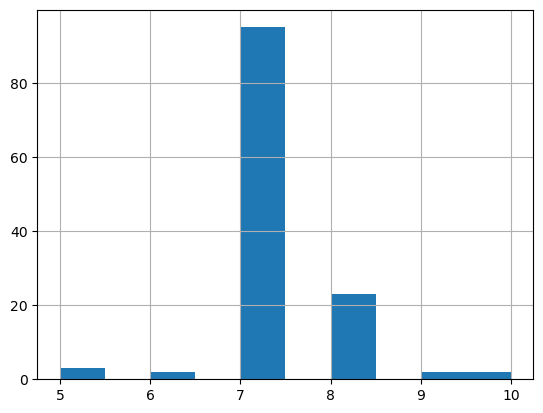

In [23]:
df_temp['Delivery_Time_Average'].value_counts(), df_temp['Delivery_Time_Average'].hist()

(Delivery_Time_Max
 14    58
 13    34
 12    24
 11     3
 10     3
 9      3
 8      1
 5      1
 Name: count, dtype: int64,
 <Axes: >)

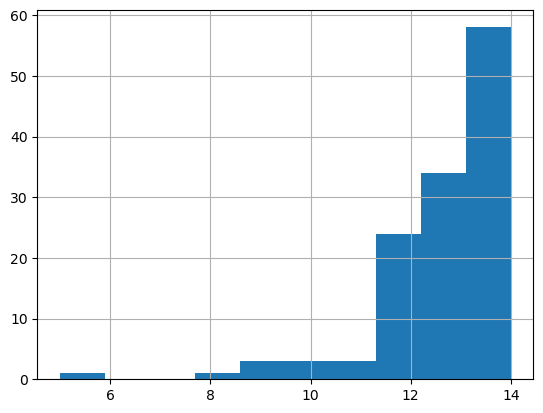

In [24]:
df_temp['Delivery_Time_Max'].value_counts(), df_temp['Delivery_Time_Max'].hist() 

(Order_Items_Average
 12    24
 13    15
 15    13
 11    11
 7     10
 14    10
 9      8
 8      7
 16     5
 10     3
 22     3
 6      3
 17     2
 4      2
 21     2
 33     1
 18     1
 19     1
 24     1
 25     1
 29     1
 5      1
 1      1
 30     1
 Name: count, dtype: int64,
 <Axes: >)

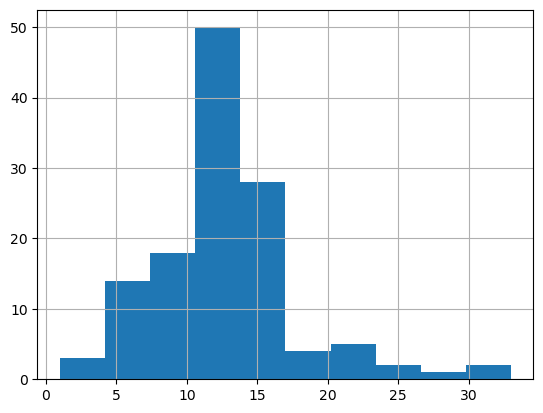

In [25]:
df_temp['Order_Items_Average'].value_counts(), df_temp['Order_Items_Average'].hist() 

(Order_Cost_Average
 302.40     2
 510.75     1
 133.14     1
 545.60     1
 239.97     1
           ..
 1135.42    1
 125.40     1
 90.20      1
 264.39     1
 304.20     1
 Name: count, Length: 126, dtype: int64,
 <Axes: >)

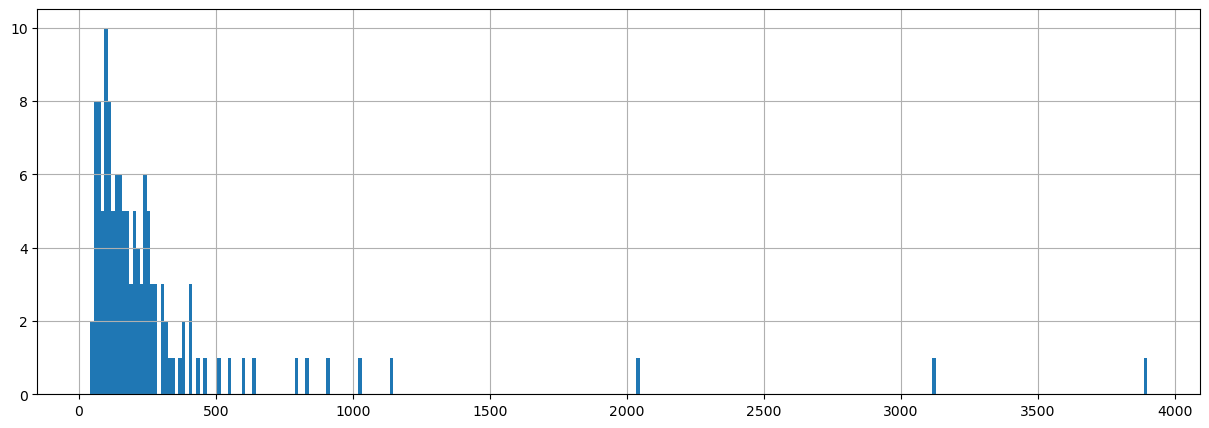

In [26]:
df_temp['Order_Cost_Average'].value_counts(), df_temp['Order_Cost_Average'].hist(bins = 300 , figsize = (15,5)) 

(Order_Profit_Average
 264.00    1
 125.52    1
 84.17     1
 153.34    1
 75.01     1
          ..
 66.48     1
 46.75     1
 91.77     1
 26.95     1
 105.17    1
 Name: count, Length: 127, dtype: int64,
 <Axes: >)

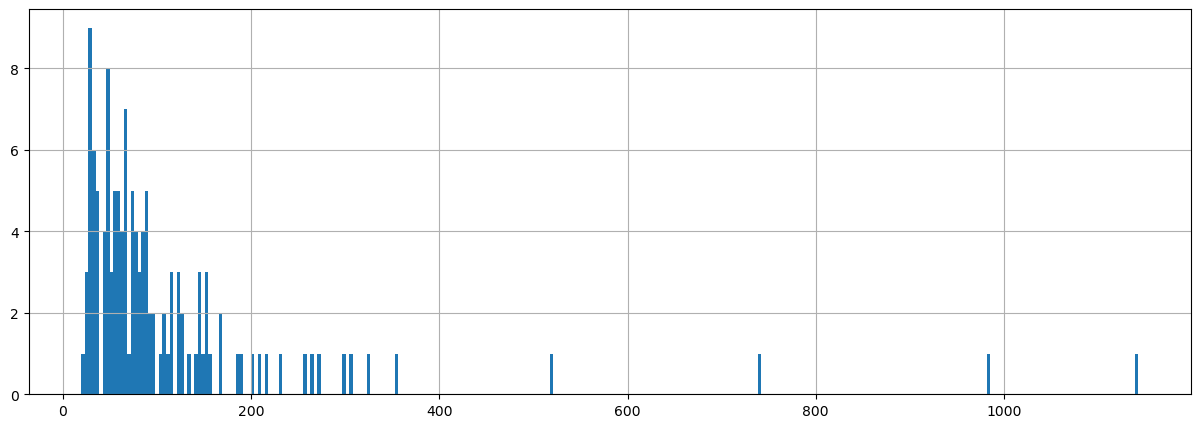

In [27]:
df_temp['Order_Profit_Average'].value_counts(), df_temp['Order_Profit_Average'].hist(bins = 300 , figsize = (15,5)) 

(Order_Profit_Average
 264.00    1
 125.52    1
 84.17     1
 153.34    1
 75.01     1
          ..
 66.48     1
 46.75     1
 91.77     1
 26.95     1
 105.17    1
 Name: count, Length: 127, dtype: int64,
 <Axes: >)

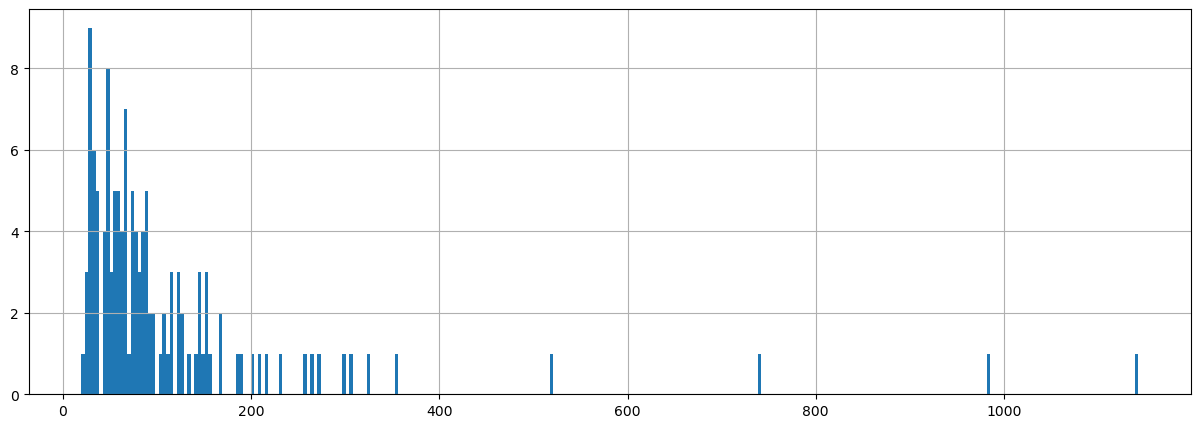

In [28]:
df_temp['Order_Profit_Average'].value_counts(), df_temp['Order_Profit_Average'].hist(bins = 300 , figsize = (15,5)) 

(Order_Revenue_Average
 0.52    10
 0.35     9
 0.51     9
 0.50     9
 0.36     7
 0.49     7
 0.31     6
 0.40     6
 0.55     5
 0.48     4
 0.59     4
 0.47     4
 0.38     4
 0.53     4
 0.34     4
 0.37     4
 0.58     3
 0.29     3
 0.56     3
 0.41     3
 0.28     2
 0.42     2
 0.32     2
 0.43     2
 0.33     2
 0.54     2
 0.46     2
 0.57     1
 0.78     1
 0.62     1
 0.44     1
 0.27     1
 Name: count, dtype: int64,
 <Axes: >)

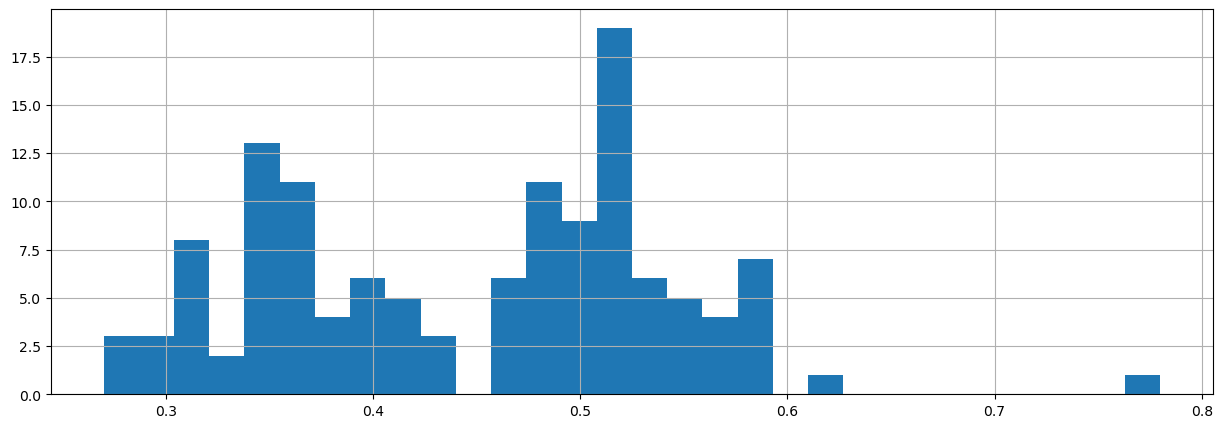

In [29]:
df_temp['Order_Revenue_Average'].value_counts(), df_temp['Order_Revenue_Average'].hist(bins = 30 , figsize = (15,5)) 

(Order_Volume_Average
 9000.0     7
 5250.0     5
 8250.0     3
 5000.0     2
 7872.0     2
           ..
 9295.0     1
 10065.0    1
 8921.0     1
 13332.0    1
 8528.0     1
 Name: count, Length: 106, dtype: int64,
 <Axes: >)

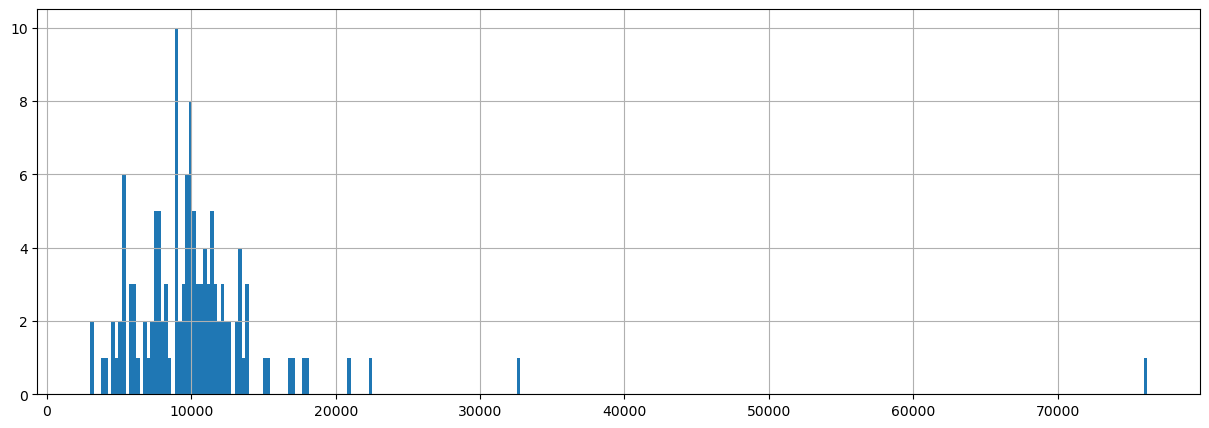

In [30]:
df_temp['Order_Volume_Average'].value_counts(), df_temp['Order_Volume_Average'].hist(bins = 300 , figsize = (15,5)) 

(Product_Cost_Average
 17.51     2
 46.32     2
 21.42     2
 8.30      2
 12.46     1
          ..
 18.43     1
 14.24     1
 103.22    1
 10.45     1
 23.40     1
 Name: count, Length: 123, dtype: int64,
 <Axes: >)

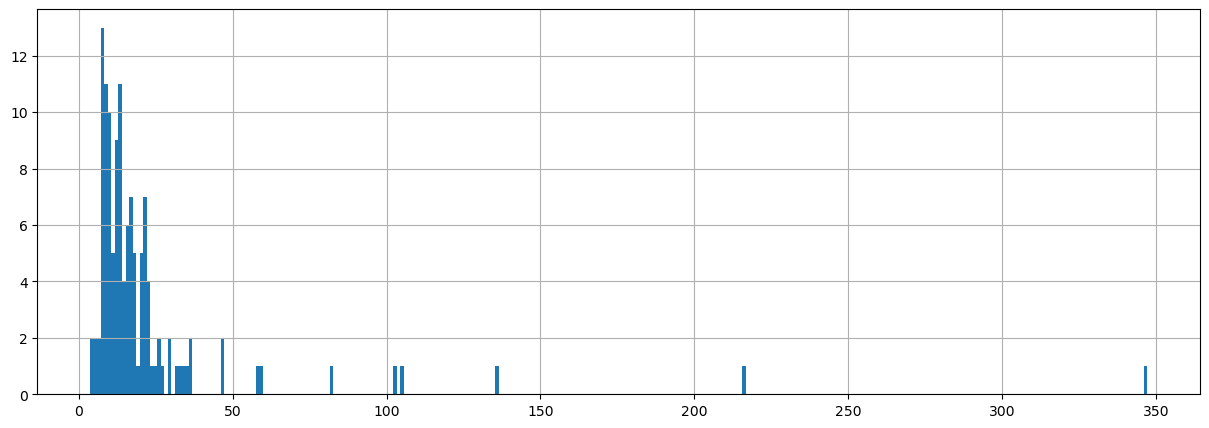

In [31]:
df_temp['Product_Cost_Average'].value_counts(), df_temp['Product_Cost_Average'].hist(bins = 300 , figsize = (15,5)) 

(Product_Profit_Average
 10.46    2
 6.77     2
 23.68    2
 9.13     2
 4.43     2
         ..
 7.48     1
 5.14     1
 32.31    1
 5.54     1
 8.09     1
 Name: count, Length: 120, dtype: int64,
 <Axes: >)

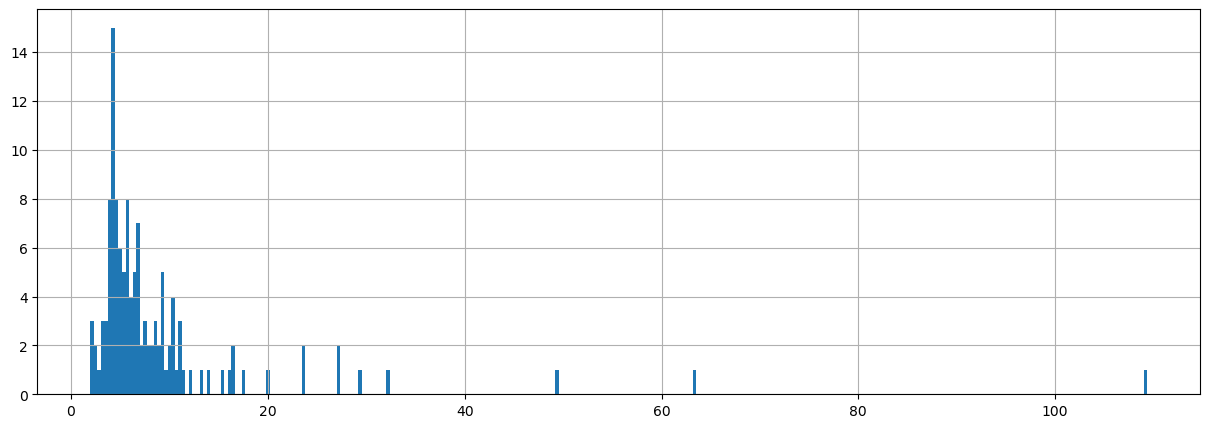

In [32]:
df_temp['Product_Profit_Average'].value_counts(), df_temp['Product_Profit_Average'].hist(bins = 300 , figsize = (15,5)) 

(Product_Revenue_Average
 0.52    10
 0.35     9
 0.51     9
 0.50     9
 0.36     7
 0.49     7
 0.31     6
 0.40     6
 0.55     5
 0.48     4
 0.59     4
 0.47     4
 0.38     4
 0.53     4
 0.34     4
 0.37     4
 0.58     3
 0.29     3
 0.56     3
 0.41     3
 0.28     2
 0.42     2
 0.32     2
 0.43     2
 0.33     2
 0.54     2
 0.46     2
 0.57     1
 0.78     1
 0.62     1
 0.44     1
 0.27     1
 Name: count, dtype: int64,
 <Axes: >)

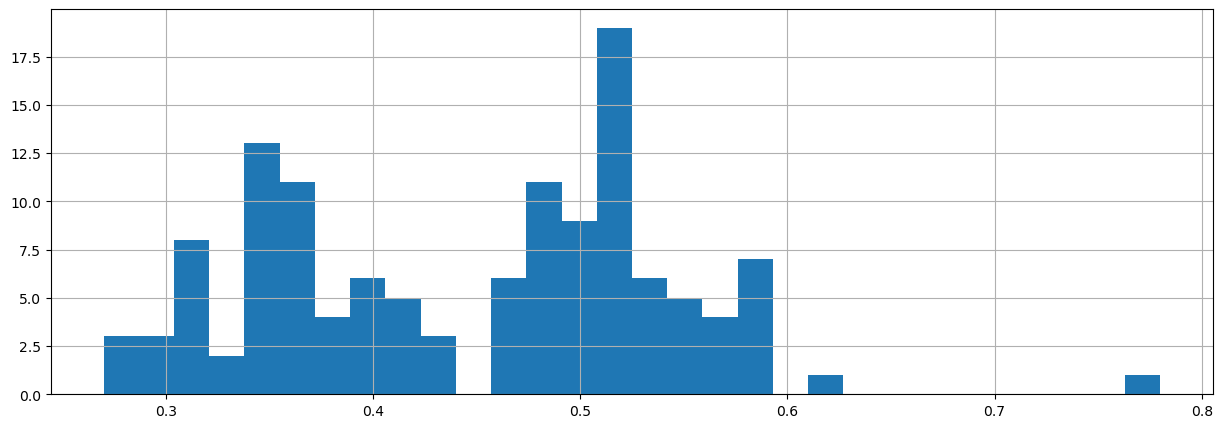

In [33]:
df_temp['Product_Revenue_Average'].value_counts(), df_temp['Product_Revenue_Average'].hist(bins = 30 , figsize = (15,5)) 

(Product_Volume_Average
 750.0     29
 656.0      3
 1125.0     3
 375.0      3
 778.0      3
           ..
 785.0      1
 886.0      1
 806.0      1
 715.0      1
 976.0      1
 Name: count, Length: 86, dtype: int64,
 <Axes: >)

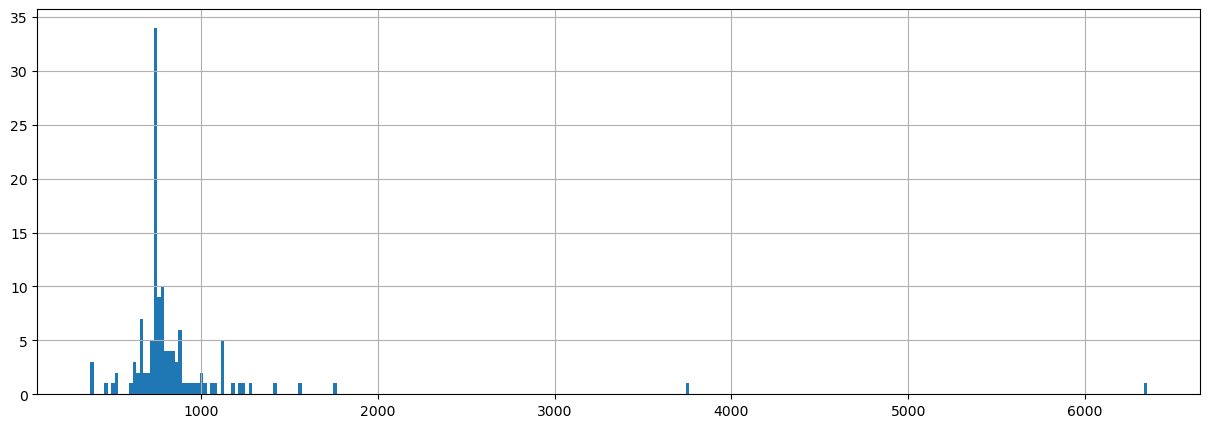

In [34]:
df_temp['Product_Volume_Average'].value_counts(), df_temp['Product_Volume_Average'].hist(bins = 300 , figsize = (15,5)) 

#### II) Création de la colonne Y

In [35]:
# Création de la colonne
df_temp.insert(13, 'Vendor_Rating', 'Nan')
df_temp

,Vendor_ID,Vendor_Name,Delivery_Time_Average,Delivery_Time_Max,Order_Items_Average,Order_Cost_Average,Order_Profit_Average,Order_Revenue_Average,Order_Volume_Average,Product_Cost_Average,Product_Profit_Average,Product_Revenue_Average,Product_Volume_Average,Vendor_Rating
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",9,11,25,510.75,264.00,0.52,11400.0,20.43,10.56,0.52,456.0,Nan
1,54,AAPER ALCOHOL & CHEMICAL CO,10,10,1,105.07,29.42,0.28,3750.0,105.07,29.42,0.28,3750.0,Nan
2,60,ADAMBA IMPORTS INTL INC,7,13,8,103.52,32.40,0.31,11328.0,12.94,4.05,0.31,1416.0,Nan
3,105,ALTAMAR BRANDS LLC,7,12,6,128.52,45.42,0.35,3198.0,21.42,7.57,0.35,533.0,Nan
4,200,AMERICAN SPIRITS EXCHANGE,8,11,16,130.88,66.24,0.51,12000.0,8.18,4.14,0.51,750.0,Nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,90059,BLACK COVE BEVERAGES,9,13,21,330.54,89.25,0.27,7875.0,15.74,4.25,0.27,375.0,Nan
123,98450,Serralles Usa LLC,7,14,7,111.16,34.44,0.31,6832.0,15.88,4.92,0.31,976.0,Nan
124,99166,STARK BREWING COMPANY,8,12,30,642.60,257.10,0.40,22500.0,21.42,8.57,0.40,750.0,Nan
125,172662,SWEETWATER FARM,7,13,11,222.20,75.79,0.34,7425.0,20.20,6.89,0.34,675.0,Nan


In [36]:
# Création de la fonction qui va classer chaque vendeur
def VendorRating(df, column):
    for c in df.values: 
        
        # Création de la note
        rating = 0
        
        # Gradation de Delivery_Time_Average et ajout à la note 
        if c[2] <= 6:
            rating += 5
        elif 7 <= c[2] < 8:
            rating += 4
        elif 8 <= c[2] < 9:
            rating += 3
        elif 9 <= c[2] < 10:
            rating += 2
        else:
            rating += 1

        # Gradation de Delivery_Time_Max et ajout à la note
        if 5 <= c[3] <= 8:
            rating += 5
        elif 9 <= c[3] < 10:
            rating += 4
        elif 10 <= c[3] <= 11:
            rating += 3
        elif 12 <= c[3] <= 13:
            rating += 2
        else:
            rating += 1    


        # Gradation de Order_Items_Average et ajout à la note
        if c[4] <= 5:
            rating += 5
        elif 6 <= c[4] <= 10:
            rating += 4
        elif 11 <= c[4] <= 15:
            rating += 3
        elif 16 <= c[4] <= 20:
            rating += 2
        else:
            rating += 1    


        # Gradation de Order_Cost_Average et ajout à la note
        if c[5] <= 250:
            rating += 5
        elif 250 < c[5] <= 350:
            rating += 4
        elif 350 < c[5] <= 500:
            rating += 3
        elif 500 < c[5] <= 1000:
            rating += 2
        else:
            rating += 1   

        
        # Gradation de Order_Profit_Average et ajout à la note
        if c[6] >= 400:
            rating += 5
        elif 400 > c[6] >= 200:
            rating += 4
        elif 200 > c[6] >= 100:
            rating += 3
        elif 100 > c[6] >= 50:
            rating += 2
        else:
            rating += 1   


        # Gradation de Order_Revenue_Average et ajout à la note
        if c[7] >= 0.6:
            rating += 5
        elif 0.6 > c[7] >= 0.5:
            rating += 4
        elif 0.5 > c[7] >= 0.4:
            rating += 3
        elif 0.4 > c[7] >= 0.3:
            rating += 2
        else:
            rating += 1   


        # Gradation de Order_Volume_Average et ajout à la note
        if c[8] <= 7500:
            rating += 5
        elif 7500 < c[8] <= 10000:
            rating += 4
        elif 10000 < c[8] <= 12500:
            rating += 3
        elif 12500 < c[8] <= 20000:
            rating += 2
        else:
            rating += 1   


        # Gradation de Product_Cost_Average et ajout à la note
        if c[9] < 10:
            rating += 5
        elif 10 < c[9] < 25:
            rating += 4
        elif 25 <= c[9] < 50:
            rating += 3
        elif 50 <= c[9] < 100:
            rating += 2
        else:
            rating += 1   


        # Gradation de Product_Profit_Average et ajout à la note
        if c[10] > 50:
            rating += 5
        elif 50 > c[10] >= 20:
            rating += 4
        elif 20 > c[10] >= 15:
            rating += 3
        elif 15 > c[10] >= 7.5:
            rating += 2
        else:
            rating += 1   


        # Gradation de Product_Revenue_Average et ajout à la note
        if c[11] >= 0.6:
            rating += 5
        elif 0.6 > c[11] >= 0.5:
            rating += 4
        elif 0.5 > c[11] >= 0.4:
            rating += 3
        elif 0.4 > c[11] >= 0.3:
            rating += 2
        else:
            rating += 1   

        
        # Gradation de Product_Volume_Average et ajout à la note
        if c[12] < 500:
            rating += 5
        elif 500 <= c[12] < 750:
            rating += 4
        elif 750 <= c[12] < 1000:
            rating += 3
        elif 1000 <= c[12] < 2000:
            rating += 2
        else:
            rating += 1


        if rating/11 >= 4.21:
            df.loc[df['Vendor_ID'] == c[0], column] = 5
        elif rating/11 >= 3.41:
            df.loc[df['Vendor_ID'] == c[0], column] = 4
        elif rating/11 >= 2.61:
            df.loc[df['Vendor_ID'] == c[0], column] = 3
        elif rating/11 >= 1.81:
            df.loc[df['Vendor_ID'] == c[0], column] = 2
        else:
            df.loc[df['Vendor_ID'] == c[0], column] = 1

In [37]:
# Remplacement des valeurs par les notes de chaque vendeur
VendorRating(df_temp, 'Vendor_Rating')
df_temp

,Vendor_ID,Vendor_Name,Delivery_Time_Average,Delivery_Time_Max,Order_Items_Average,Order_Cost_Average,Order_Profit_Average,Order_Revenue_Average,Order_Volume_Average,Product_Cost_Average,Product_Profit_Average,Product_Revenue_Average,Product_Volume_Average,Vendor_Rating
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",9,11,25,510.75,264.00,0.52,11400.0,20.43,10.56,0.52,456.0,3
1,54,AAPER ALCOHOL & CHEMICAL CO,10,10,1,105.07,29.42,0.28,3750.0,105.07,29.42,0.28,3750.0,2
2,60,ADAMBA IMPORTS INTL INC,7,13,8,103.52,32.40,0.31,11328.0,12.94,4.05,0.31,1416.0,3
3,105,ALTAMAR BRANDS LLC,7,12,6,128.52,45.42,0.35,3198.0,21.42,7.57,0.35,533.0,3
4,200,AMERICAN SPIRITS EXCHANGE,8,11,16,130.88,66.24,0.51,12000.0,8.18,4.14,0.51,750.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,90059,BLACK COVE BEVERAGES,9,13,21,330.54,89.25,0.27,7875.0,15.74,4.25,0.27,375.0,2
123,98450,Serralles Usa LLC,7,14,7,111.16,34.44,0.31,6832.0,15.88,4.92,0.31,976.0,3
124,99166,STARK BREWING COMPANY,8,12,30,642.60,257.10,0.40,22500.0,21.42,8.57,0.40,750.0,2
125,172662,SWEETWATER FARM,7,13,11,222.20,75.79,0.34,7425.0,20.20,6.89,0.34,675.0,3


In [38]:
df_temp['Vendor_Rating']  = df_temp['Vendor_Rating'].astype(int)

In [39]:
df_temp['Vendor_Rating'].value_counts()

Vendor_Rating
3    107
2     10
4     10
Name: count, dtype: int64

In [40]:
df_temp['Vendor_Rating'].dtype

dtype('int32')

### Chapitre 3 : Création du modéle
Ici nous allons créer le modéle servant à prédire le classe de chaque vendeur

In [41]:
# Importation du modéle et des outils nécessaires
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Métriques afin d'évaluer le modèle
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay

In [42]:
# Création des labels et du predict
X = df_temp.drop(['Vendor_ID', 'Vendor_Name', 'Vendor_Rating'], axis = 1)
y = df_temp['Vendor_Rating']

In [43]:
# Check si cela a fonctionné pour X
X

,Delivery_Time_Average,Delivery_Time_Max,Order_Items_Average,Order_Cost_Average,Order_Profit_Average,Order_Revenue_Average,Order_Volume_Average,Product_Cost_Average,Product_Profit_Average,Product_Revenue_Average,Product_Volume_Average
0,9,11,25,510.75,264.00,0.52,11400.0,20.43,10.56,0.52,456.0
1,10,10,1,105.07,29.42,0.28,3750.0,105.07,29.42,0.28,3750.0
2,7,13,8,103.52,32.40,0.31,11328.0,12.94,4.05,0.31,1416.0
3,7,12,6,128.52,45.42,0.35,3198.0,21.42,7.57,0.35,533.0
4,8,11,16,130.88,66.24,0.51,12000.0,8.18,4.14,0.51,750.0
...,...,...,...,...,...,...,...,...,...,...,...
122,9,13,21,330.54,89.25,0.27,7875.0,15.74,4.25,0.27,375.0
123,7,14,7,111.16,34.44,0.31,6832.0,15.88,4.92,0.31,976.0
124,8,12,30,642.60,257.10,0.40,22500.0,21.42,8.57,0.40,750.0
125,7,13,11,222.20,75.79,0.34,7425.0,20.20,6.89,0.34,675.0


In [44]:
# Check si cela a fonctionné pour y
y

0      3
1      2
2      3
3      3
4      3
      ..
122    2
123    3
124    2
125    3
126    3
Name: Vendor_Rating, Length: 127, dtype: int32

In [45]:
# Division de la data en deux échantillons (test et train)
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [46]:
X_train

,Delivery_Time_Average,Delivery_Time_Max,Order_Items_Average,Order_Cost_Average,Order_Profit_Average,Order_Revenue_Average,Order_Volume_Average,Product_Cost_Average,Product_Profit_Average,Product_Revenue_Average,Product_Volume_Average
68,7,14,13,107.90,58.24,0.54,10049.0,8.30,4.48,0.54,773.0
69,7,12,7,231.56,123.41,0.53,5271.0,33.08,17.63,0.53,753.0
12,7,14,17,437.07,153.68,0.35,13855.0,25.71,9.04,0.35,815.0
42,7,14,22,792.00,271.04,0.34,17732.0,36.00,12.32,0.34,806.0
31,7,13,15,164.70,70.65,0.43,15150.0,10.98,4.71,0.43,1010.0
...,...,...,...,...,...,...,...,...,...,...,...
106,7,14,13,178.36,90.22,0.51,13728.0,13.72,6.94,0.51,1056.0
14,8,12,4,56.20,43.76,0.78,3000.0,14.05,10.94,0.78,750.0
92,7,14,22,285.34,153.34,0.54,16896.0,12.97,6.97,0.54,768.0
51,5,12,12,116.04,63.84,0.55,9000.0,9.67,5.32,0.55,750.0


In [47]:
y_train

68     3
69     4
12     2
42     2
31     3
      ..
106    3
14     4
92     3
51     4
102    3
Name: Vendor_Rating, Length: 101, dtype: int32

In [48]:
# Mettre les modèles dans un dictionnaire
models = {'Linear Support Vector Machine': svm.LinearSVC(),
          'KNN': KNeighborsClassifier(),
          'Suppor Vector Classifier': svm.SVC(),
          'Random Forest': RandomForestClassifier()}

# Fonction pour fit et évaluer nos modèles
def fit_et_eval(models, X_train, X_test, y_train, y_test):
    """
    Fit et évaluer les modèles de Machine Learning
    Modèles: Dictionnaire de modèles Scikit-Learn
    """
    # Random seed
    np.random.seed(42)
    #Dictionnaire
    model_scores = {}
    # Loop les modèles
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [49]:
# evaluer chaque model
evaluation_model = fit_et_eval(models, X_train, X_test, y_train, y_test)
evaluation_model

{'Linear Support Vector Machine': 0.8846153846153846,
 'KNN': 0.8461538461538461,
 'Suppor Vector Classifier': 0.8846153846153846,
 'Random Forest': 0.9615384615384616}

## Hyperparametering

Ici nous allons customiser les paramètres du modèle le plus efficace

### RandomizedSearchCV

In [50]:
# Création d'une grille avec les différents paramètres à tester pour RandomForestClassifier(RFC)
rfc_grid = {
    'n_estimators' : np.arange(10, 1000, 50),
    'max_depth' : [None, 3, 5, 10, 15, 20],
    'min_samples_leaf' : np.arange(1, 20, 1),
    'min_samples_split' : np.arange(2, 40, 2)
}

In [51]:
# # Tuning de RFC
# # Random Seed
# np.random.seed(42)

# # RandomiszedSearchCV
# rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
#                            param_distributions = rfc_grid,
#                            cv = 5,
#                            n_iter = 1000,
#                            verbose = True)

# # Fit du model
# rs_rfc.fit(X_train, y_train)

{'n_estimators': 10,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': None}

In [103]:
rs_rfc.best_params_

{'n_estimators': 10,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': None}

In [104]:
rs_rfc.score(X_test, y_test)

0.8846153846153846

### GridSearchCV

In [53]:
# Grille numéro 2
rfc_grid_2 = {
    'n_estimators' : np.arange(10, 100, 50),
    'max_depth' : [None, 3, 5, 10, 15],
    'min_samples_leaf' : np.arange(1, 10, 1),
    'min_samples_split' : np.arange(2, 20, 2)
}

In [52]:
# # Tuning de RFC
# # Random Seed
# np.random.seed(42)

# # GridSearchCV
# gs_rfc = GridSearchCV(RandomForestClassifier(),
#                       param_grid = rfc_grid_2,
#                       cv = 5,
#                       verbose = True)

# # Fit model
# gs_rfc.fit(X_train, y_train)

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [109]:
gs_rfc.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [110]:
gs_rfc.score(X_test, y_test)

0.9230769230769231

In [111]:
# # Test 2
# # Grille numéro 3
# rfc_grid_3 = {
#     'n_estimators' : np.arange(10, 500, 50),
#     'max_depth' : [None, 3, 5, 10, 15, 20],
#     'min_samples_leaf' : np.arange(1, 20, 1),
#     'min_samples_split' : np.arange(2, 40, 2)
# }

# # Tuning de RFC
# # Random Seed
# np.random.seed(42)

# # GridSearchCV
# gs_rfc_2 = GridSearchCV(RandomForestClassifier(),
#                       param_grid = rfc_grid_3,
#                       cv = 5,
#                       verbose = True)

# # Fit model
# gs_rfc_2.fit(X_train, y_train)

Fitting 5 folds for each of 21660 candidates, totalling 108300 fits


C:\Users\frdi\OneDrive\Bureau\projet\env\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10, 15, 20],
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38]),
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460])},
             verbose=True)

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 10}

In [112]:
gs_rfc_2.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 10}

In [113]:
gs_rfc_2.score(X_test, y_test)

0.9615384615384616

Toutes les GridSearchCV et les RandomizedSearchCV ont été mis en mode commentaire puisque ce projet a été fait sur plusieurs jours. Les modèles gs et rs n'ont donc existé qu'une seule fois afin de déterminer si l"hyperparametrage fonctionnait ou non. Quoiqu'il en soit, les paramètres de base donnent les mêmes résultats qu'une GridSearchCV poussée (qui a pris 6h à faire). Nous allons donc garder le modèle de base.

## Évaluation du modèle

In [62]:
# Création du modèle RandomForestClassifier et fit.
np.random.seed(42)
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
RFC.score(X_test, y_test)

0.9615384615384616

In [65]:
# Test du modèle sur plusieurs seed
scores = []
for x in np.arange(1,50,1):
    np.random.seed(x)
    RFC.fit(X_train, y_train)
    scores.append(RFC.score(X_test, y_test))

print(scores)

[0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9615384615384616, 0.9230769230769231, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9230769230769231, 0.9615384615384616, 0.9615384615384616, 0.9230769230769231, 0.9615384615384616, 0.9230769230769231, 0.9230769230769231, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9230769230769231, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9230769230769231, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616]


In [74]:
# Moyenne des scores sur plusieurs Seeds
np.array(scores).mean()

0.9536891679748821

Voici donc la vraie précision de ce modèle. On observe que le modèle obtien soit 0.92... ou 0.96... et toujours avec les mêmes chiffres après coup. Nous pouvons donc effectuer les test pour les deux scores afind d'être le plus précis possible.

### RandomSeed(42) = 0.96

In [75]:
# Création du modèle
np.random.seed(42)
RFC42 = RandomForestClassifier()
RFC42.fit(X_train, y_train)
RFC42.score(X_test, y_test)

0.9615384615384616

In [87]:
# Faire des prédictions afin de créer les évaluations
y_preds42 = RFC42.predict(X_test)

In [88]:
# Résultat des prédictions
y_preds42

array([3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3])

In [81]:
# Vrais résultats
y_test

26     3
111    3
81     4
55     3
44     3
96     3
80     3
125    3
114    3
62     3
45     3
4      3
18     3
95     2
36     3
94     3
19     3
120    3
10     3
40     3
11     3
98     3
104    3
77     3
0      3
78     4
Name: Vendor_Rating, dtype: int32

In [89]:
# Matrice de confusion
confusion_matrix(y_test, y_preds42)

array([[ 1,  0,  0],
       [ 0, 23,  0],
       [ 0,  1,  1]], dtype=int64)

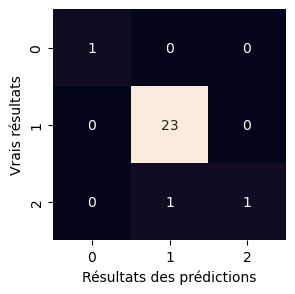

In [90]:
# Graphique de la matrice
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Résultats des prédictions") # predictions go on the x-axis
    plt.ylabel("Vrais résultats") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds42)

In [91]:
print(classification_report(y_test, y_preds42))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00         1
           3       0.96      1.00      0.98        23
           4       1.00      0.50      0.67         2

    accuracy                           0.96        26
   macro avg       0.99      0.83      0.88        26
weighted avg       0.96      0.96      0.96        26



### RandomSeed(6) = 0.92

In [92]:
# Création du modèle
np.random.seed(6)
RFC6 = RandomForestClassifier()
RFC6.fit(X_train, y_train)
RFC6.score(X_test, y_test)

0.9230769230769231

In [93]:
# Faire des prédictions afin de créer les évaluations
y_preds6 = RFC6.predict(X_test)

In [94]:
# Prédictions
y_preds6

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3])

In [95]:
# Vrai réponses 
y_test

26     3
111    3
81     4
55     3
44     3
96     3
80     3
125    3
114    3
62     3
45     3
4      3
18     3
95     2
36     3
94     3
19     3
120    3
10     3
40     3
11     3
98     3
104    3
77     3
0      3
78     4
Name: Vendor_Rating, dtype: int32

In [97]:
# Matrice
confusion_matrix(y_test, y_preds6)

array([[ 1,  0,  0],
       [ 0, 23,  0],
       [ 0,  2,  0]], dtype=int64)

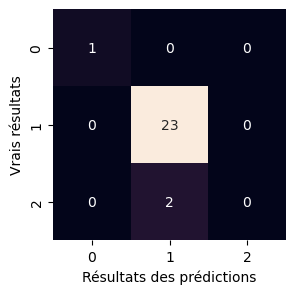

In [98]:
# Graphique de la matrice
plot_conf_mat(y_test, y_preds6)

In [101]:
print(classification_report(y_test, y_preds6))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00         1
           3       0.92      1.00      0.96        23
           4       0.00      0.00      0.00         2

    accuracy                           0.92        26
   macro avg       0.64      0.67      0.65        26
weighted avg       0.85      0.92      0.89        26



C:\Users\frdi\OneDrive\Bureau\projet\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\frdi\OneDrive\Bureau\projet\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\frdi\OneDrive\Bureau\projet\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

## Importance de chaque variable

In [148]:
# Coef de chaque variable
RFC42.feature_importances_

array([0.08539039, 0.06502844, 0.17391157, 0.07851139, 0.04997755,
       0.11422975, 0.14958526, 0.0452946 , 0.06115642, 0.11714589,
       0.05976873])

In [154]:
# Dictionnaire des variables
Var_Dict = dict(zip(X.columns, list(RFC42.feature_importances_)))
Var_Dict

{'Delivery_Time_Average': 0.08539039145743259,
 'Delivery_Time_Max': 0.06502844491358471,
 'Order_Items_Average': 0.17391157219309433,
 'Order_Cost_Average': 0.07851139430498315,
 'Order_Profit_Average': 0.04997754956143674,
 'Order_Revenue_Average': 0.11422975433535205,
 'Order_Volume_Average': 0.14958525577829285,
 'Product_Cost_Average': 0.04529460108273109,
 'Product_Profit_Average': 0.061156419007304716,
 'Product_Revenue_Average': 0.11714589218277524,
 'Product_Volume_Average': 0.059768725183012544}

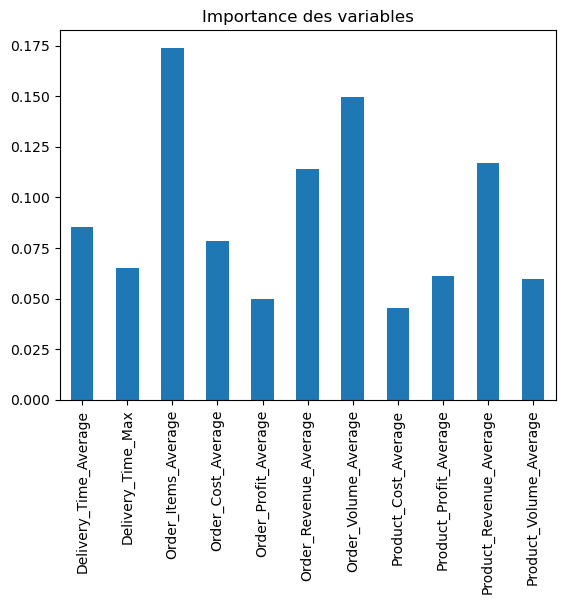

In [155]:
# Visualisation 
features_df = pd.DataFrame(Var_Dict, index = [0])
features_df.T.plot.bar(title = 'Importance des variables', legend = False);

In [156]:
# Coef de chaque variable
RFC6.feature_importances_

array([0.07811209, 0.09413495, 0.1551459 , 0.07890962, 0.03880875,
       0.12487073, 0.15269817, 0.04178125, 0.0463539 , 0.12513822,
       0.06404641])

In [157]:
# Dictionnaire des variables
Var_Dict6 = dict(zip(X.columns, list(RFC6.feature_importances_)))
Var_Dict6

{'Delivery_Time_Average': 0.07811209231635134,
 'Delivery_Time_Max': 0.09413495135543365,
 'Order_Items_Average': 0.15514590276005555,
 'Order_Cost_Average': 0.07890961703496958,
 'Order_Profit_Average': 0.03880875086739902,
 'Order_Revenue_Average': 0.12487073479392204,
 'Order_Volume_Average': 0.1526981717408686,
 'Product_Cost_Average': 0.04178125003546403,
 'Product_Profit_Average': 0.04635389812304629,
 'Product_Revenue_Average': 0.12513821962625687,
 'Product_Volume_Average': 0.06404641134623305}

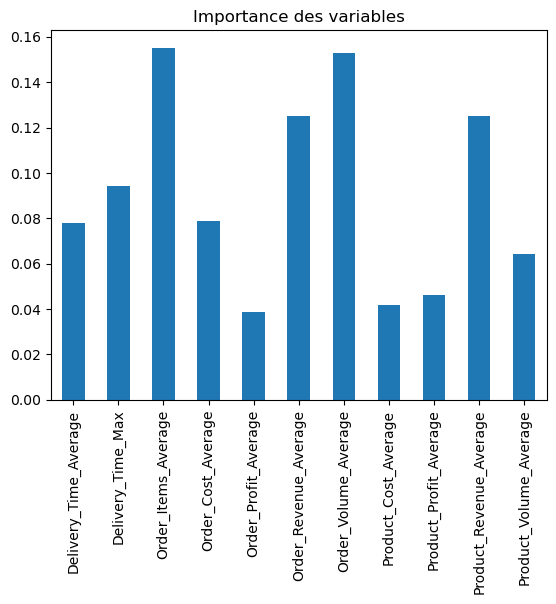

In [158]:
# Visualisation 
features_df = pd.DataFrame(Var_Dict6, index = [0])
features_df.T.plot.bar(title = 'Importance des variables', legend = False);